In [2]:
import pandas as pd
filtered_df = pd.read_csv("../data/interm/predictBERT.csv", index_col=None)
test_df = pd.read_csv("../data/interm/predictVOCAB.csv", index_col=None)

In [3]:
combined_df = pd.concat([filtered_df, test_df])
combined_df = combined_df.sort_values(by='tr_tox')
unique_combined_df = combined_df.drop_duplicates(subset='reference', keep='first')
unique_combined_df = unique_combined_df.sort_values(by=unique_combined_df.columns[0])

In [19]:
unique_combined_df.head()

,Unnamed: 0,reference,ref_tox,translate,tr_tox,result
0,0,"They're all laughing at us, so we'll kick your...",0.999492,"they ' re all laughing at us , so we ' ll kick...",0.004992,0.994501
1,1,"Come on, Cal, leave that shit alone.",0.999637,"Come on, Cal, your that . of.",0.090920,0.908717
2,2,I like that shit.,0.999594,i like that stuff .,0.817350,0.182244
3,3,How is this not porn? This is porn that comes ...,0.933948,How is this havet porn? This is porn that come...,0.902331,0.031617
4,4,"Now, I understand you got your grievances with...",0.999603,"now , i understand you got your side of issues...",0.021518,0.978085


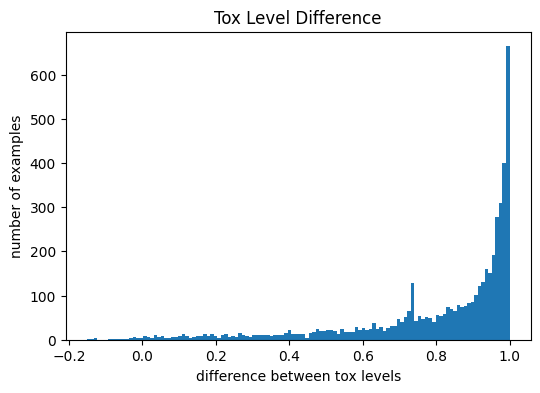

In [21]:
import matplotlib.pyplot as plt

result = unique_combined_df['result'].tolist()

n_bins=120
plt.figure(figsize=(6, 4))  # Создаем первый график
plt.ylabel('number of examples')
plt.xlabel('difference between tox levels')
plt.hist(result, bins=n_bins)
plt.title('Tox Level Difference')
plt.show()

In [23]:
average_value = unique_combined_df['tr_tox'].mean()

In [24]:
average_value

0.1611286334046707

In [25]:
av_bert = filtered_df['tr_tox'].mean()

In [26]:
av_bert

0.34245436556839703

In [29]:
av_vocab = test_df['tr_tox'].mean()

In [30]:
av_vocab

0.3538098135593847

In [4]:
unique_combined_df.to_csv("../data/external/result.csv")